#### Part 1 Data Preprocessing and Transformation

In [826]:
# Importing Libraries
import pandas as pd
import json
import ast
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np  
import re
from sklearn import pipeline

In [827]:
#Importing Jason mapping file

with open('mappings.json_(DS_A-L2).json', 'r') as f:
    data = json.load(f)
rows = [
    {'tag': tag, 'offering': values[0], 'destination': values[1]}
    for tag, values in data['tags_mapping'].items()
]

df_tags = pd.DataFrame(rows)
df_tags

,tag,offering,destination
0,c07bbh0cu1iccnqmcq00,Accommodation,Abha
1,c07bbj4bb64t6si78rh0,Food & Beverage,Abha
2,c07bbvvepd3oq1r122o0,Retail,Abha
3,c9g7nos8hb0qun2qahmg,Religious,Abha
4,c9g7o87epd3vh6lri8bg,Tourism Attractions/ Sites,Abha
...,...,...,...
108,c9g97fk8hb0qun2qahu0,Religious,Qassim
109,c9g97g4bb64rs4ni6s00,Retail,Qassim
110,c9g97ggcu1ielf8dr39g,Tourism Attractions/ Sites,Qassim
111,c9g9s70cu1ielf8dr3dg,Food & Beverage,Tanomah


In [828]:
print(df_tags['offering'].unique())

['Accommodation' 'Food & Beverage' 'Retail' 'Religious'
 'Tourism Attractions/ Sites']


In [829]:
print(df_tags['destination'].unique())

['Abha' 'Al Ahsa' 'Al Baha' 'Al Ula' 'Dammam' 'Hail' 'Jeddah' 'Jizan'
 'KAEC' 'Khobar' 'Madinah' 'Makkah' 'Tabuk' 'Taif' 'Umluj' 'Yanbu'
 'Al Diriyah' 'Sakaka / AlJouf' 'Riyadh' 'Al Namas' 'Al Wajh' 'Duba'
 'NEOM' 'Qassim' 'Tanomah']


In [830]:
#Import Customer feedback dataset

feedback_df = pd.read_csv('dataset.csv_(DS_A-L2).csv')
feedback_df

,id,content,date,language,tags,title,ratings
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق ت...,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment'...",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}"
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر...,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment'...","King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}"
2,377380-203590496913,nice place,2021-04-11T06:45:00+00:00,eng,"[{'value': 'c0rlhqgcu1i938rekca0', 'sentiment'...",Green Mountain Resort,"{'normalized': 100, 'raw': 5}"
3,377380-203589330972,جميل❤,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment'...",Waterfront Beach Royal Commission Yanbu,"{'normalized': 80, 'raw': 4}"
4,377380-203586632060,جميييل,2021-04-11T06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment'...",Dammam Corniche,"{'normalized': 100, 'raw': 5}"
...,...,...,...,...,...,...,...
9995,377380-170059072985,More(Translated by Google) The mosque is curre...,2021-02-15T00:00:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment'...",Jawatha Mosque,"{'normalized': 60, 'raw': 3}"
9996,377380-168116614508,More(Translated by Google) The best branch of ...,2021-02-15T00:00:00+00:00,ara,"[{'value': 'c07bdifepd3oq1r122r0', 'sentiment'...",Burger King - Enoc Dareen,"{'normalized': 80, 'raw': 4}"
9997,377380-170027061275,الأكل عادي,2021-02-15T00:00:00+00:00,ara,"[{'value': 'c07bk44bb64t6si78v80', 'sentiment'...",Güzel Saray,"{'normalized': 60, 'raw': 3}"
9998,377380-167887315495,سوق كبير وجميل,2021-02-15T00:00:00+00:00,ara,"[{'value': 'c0rqvf8cu1i938rekgn0', 'sentiment'...",Riyadh Gallery Mall,"{'normalized': 80, 'raw': 4}"


In [831]:
# Check for missing values
feedback_df.isnull().sum()

id           0
content      0
date         0
language     0
tags         0
title        0
ratings     10
dtype: int64

In [832]:
#Looking into rows with NULL rating (contnent is not clear --> DROP them)
feedback_df[feedback_df.ratings.isnull()]

,id,content,date,language,tags,title,ratings
1213,377380-203592313113,"( Google) , , ( )",2021-04-11T07:14:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment'...",Riyadh Zoo,NaN
1245,377380-203592306100,"( Google) , , ( )",2021-04-11T07:15:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment'...",Riyadh Zoo,NaN
1288,377380-203592306933,( Google) - ( ),2021-04-11T07:16:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment'...",Riyadh Zoo,NaN
1456,377380-203592309887,"( Google) - , , , , , ( )",2021-04-11T07:19:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment'...",Riyadh Zoo,NaN
1481,377380-203592315650,( Google) ( ) Good place,2021-04-11T07:20:00+00:00,eng,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment'...",Riyadh Zoo,NaN
1799,377380-203588492010,"( Google) !! Abit , ( ) Awesome!! Abit cold, b...",2021-04-11T07:27:00+00:00,eng,"[{'value': 'c9g7u348hb0qun2qahng', 'sentiment'...",Raghadan Forest Park,NaN
1934,377380-203588498652,"( Google) , . ( )",2021-04-11T07:31:00+00:00,eng,"[{'value': 'c9g7u348hb0qun2qahng', 'sentiment'...",Raghadan Forest Park,NaN
2816,377380-203592291403,(Переведено Google) Зоопарк сладок еще раз еще...,2021-04-11T07:52:00+00:00,ara,"[{'value': 'c07bdofepd3oq1r123kg', 'sentiment'...",Riyadh Zoo,NaN
3189,377380-203592281835,"(Переведено Google) Парк очень красивый, не хв...",2021-04-11T08:01:00+00:00,ara,"[{'value': 'c07bdkkbb64t6si78s30', 'sentiment'...",Riyadh Zoo,NaN
3602,377380-203588466840,(Переведено Google) Лес Рагдан - красивый боль...,2021-04-11T08:11:00+00:00,ara,"[{'value': 'c9g7u348hb0qun2qahng', 'sentiment'...",Raghadan Forest Park,NaN


In [833]:
#drop row will null rating
feedback_df = feedback_df.dropna(subset=['ratings'])

In [834]:
#Checking for duplicates
feedback_df.drop('tags',axis=1).duplicated().sum()

11

In [835]:
feedback_df[feedback_df.duplicated(keep=False)].sort_values(by='content')

,id,content,date,language,tags,title,ratings
7378,377380-167656398451,More(Translated by Google) And God is an excel...,2021-02-11T00:00:00+00:00,ara,"[{'value': 'c0rquskbb64sdb6ukkq0', 'sentiment'...",Kaboria Seafood,"{'normalized': 100, 'raw': 5}"
7358,377380-167656398451,More(Translated by Google) And God is an excel...,2021-02-11T00:00:00+00:00,ara,"[{'value': 'c0rquskbb64sdb6ukkq0', 'sentiment'...",Kaboria Seafood,"{'normalized': 100, 'raw': 5}"
7368,377380-167972760325,More(Translated by Google) Best Arabic coffee ...,2021-02-11T00:00:00+00:00,eng,"[{'value': 'c07bdkkbb64t6si78s2g', 'sentiment'...",Haif & Kaif Cafe,"{'normalized': 80, 'raw': 4}"
7356,377380-167972760325,More(Translated by Google) Best Arabic coffee ...,2021-02-11T00:00:00+00:00,eng,"[{'value': 'c07bdkkbb64t6si78s2g', 'sentiment'...",Haif & Kaif Cafe,"{'normalized': 80, 'raw': 4}"
7357,377380-167750997640,More(Translated by Google) One of the largest ...,2021-02-11T00:00:00+00:00,ara,"[{'value': 'c0rqvf8cu1i938rekgn0', 'sentiment'...",Hayat Mall,"{'normalized': 100, 'raw': 5}"
7377,377380-167750997640,More(Translated by Google) One of the largest ...,2021-02-11T00:00:00+00:00,ara,"[{'value': 'c0rqvf8cu1i938rekgn0', 'sentiment'...",Hayat Mall,"{'normalized': 100, 'raw': 5}"
6331,377380-167303028855,اجيك يسلم راسك وشلون ما جيك .. الذ والذ استلذا...,2021-02-09T00:00:00+00:00,ara,"[{'value': 'c0rquskbb64sdb6ukkq0', 'sentiment'...",Ibrahim Al Zahrani Grills,"{'normalized': 100, 'raw': 5}"
6442,377380-167303028855,اجيك يسلم راسك وشلون ما جيك .. الذ والذ استلذا...,2021-02-09T00:00:00+00:00,ara,"[{'value': 'c0rquskbb64sdb6ukkq0', 'sentiment'...",Ibrahim Al Zahrani Grills,"{'normalized': 100, 'raw': 5}"
821,377380-203582792636,تحتاج خلاط وتطلع ممتازه,2021-04-11T07:05:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7ag0', 'sentiment'...",Uqair Beach,"{'normalized': 100, 'raw': 5}"
825,377380-203582792636,تحتاج خلاط وتطلع ممتازه,2021-04-11T07:05:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7ag0', 'sentiment'...",Uqair Beach,"{'normalized': 100, 'raw': 5}"


In [836]:
#Drop duplicated rows
feedback_df = feedback_df.drop_duplicates(subset=feedback_df.columns.difference(['tags']))

In [837]:
#Row with only emojis in content
import re

def is_only_emojis(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags
        "\U00002700-\U000027BF"  # Dingbats
        "\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    cleaned = emoji_pattern.sub('', str(text)).strip()
    return cleaned == ''

feedback_df[feedback_df['content'].apply(is_only_emojis)]

,id,content,date,language,tags,title,ratings
188,377380-203589373533,👍👍,2021-04-11T06:50:00+00:00,eng,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment'...",Alsubh Park,"{'normalized': 100, 'raw': 5}"
446,377380-203588636362,😊,2021-04-11T06:56:00+00:00,eng,"[{'value': 'c0rlhqgcu1i938rekca0', 'sentiment'...",Al Hada Cable Car,"{'normalized': 100, 'raw': 5}"
732,377380-203587032505,👍🏻,2021-04-11T07:03:00+00:00,eng,"[{'value': 'c07bdkkbb64t6si78s3g', 'sentiment'...",Al Mahmal Center,"{'normalized': 100, 'raw': 5}"
759,377380-203584368249,👍💞💞,2021-04-11T07:04:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment'...",Modon Lake Park,"{'normalized': 100, 'raw': 5}"
774,377380-203590458986,😘,2021-04-11T07:04:00+00:00,eng,"[{'value': 'c0rlhqgcu1i938rekca0', 'sentiment'...",Green Mountain Resort,"{'normalized': 100, 'raw': 5}"
1125,377380-203587479887,👍👍👍,2021-04-11T07:12:00+00:00,eng,"[{'value': 'c9g9fck8hb0qun2qahug', 'sentiment'...",12 Springs of Prophet Moses (A.S.),"{'normalized': 100, 'raw': 5}"
2761,377380-203583706809,👍🏽👍🏽,2021-04-11T07:51:00+00:00,eng,"[{'value': 'c9g869k8hb0qun2qahp0', 'sentiment'...",Al Meger Tourist Village,"{'normalized': 60, 'raw': 3}"
2783,377380-203585828099,👍,2021-04-11T07:52:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment'...",Khobar Sea Front,"{'normalized': 100, 'raw': 5}"
2838,377380-203584979382,✅✅✅✅✅,2021-04-11T07:53:00+00:00,eng,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment'...",King Abdulaziz Center for World Culture - Ithra,"{'normalized': 100, 'raw': 5}"
3548,377380-203584551079,😍,2021-04-11T08:10:00+00:00,eng,"[{'value': 'c9g9th4bb64rs4ni6s70', 'sentiment'...",Umluj Beach,"{'normalized': 100, 'raw': 5}"


In [838]:
#Dropping rows with only emojis
feedback_df = feedback_df[~feedback_df['content'].apply(is_only_emojis)]

In [839]:
#Invesitgating data types
feedback_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9951 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        9951 non-null   object
 1   content   9951 non-null   object
 2   date      9951 non-null   object
 3   language  9951 non-null   object
 4   tags      9951 non-null   object
 5   title     9951 non-null   object
 6   ratings   9951 non-null   object
dtypes: object(7)
memory usage: 621.9+ KB


In [840]:
#Convert date column to date format 
feedback_df['date'] = pd.to_datetime(feedback_df['date'])

#Convert a string representation of a list to an actual list
feedback_df['tags'] = feedback_df['tags'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
feedback_df['ratings'] = feedback_df['ratings'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [841]:
feedback_df

,id,content,date,language,tags,title,ratings
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق ت...,2021-04-11 06:45:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment'...",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}"
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر...,2021-04-11 06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment'...","King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}"
2,377380-203590496913,nice place,2021-04-11 06:45:00+00:00,eng,"[{'value': 'c0rlhqgcu1i938rekca0', 'sentiment'...",Green Mountain Resort,"{'normalized': 100, 'raw': 5}"
3,377380-203589330972,جميل❤,2021-04-11 06:45:00+00:00,ara,"[{'value': 'c9ga0skbb64rs4ni6s7g', 'sentiment'...",Waterfront Beach Royal Commission Yanbu,"{'normalized': 80, 'raw': 4}"
4,377380-203586632060,جميييل,2021-04-11 06:45:00+00:00,ara,"[{'value': 'c07bdncbb64t6si78ssg', 'sentiment'...",Dammam Corniche,"{'normalized': 100, 'raw': 5}"
...,...,...,...,...,...,...,...
9995,377380-170059072985,More(Translated by Google) The mosque is curre...,2021-02-15 00:00:00+00:00,ara,"[{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment'...",Jawatha Mosque,"{'normalized': 60, 'raw': 3}"
9996,377380-168116614508,More(Translated by Google) The best branch of ...,2021-02-15 00:00:00+00:00,ara,"[{'value': 'c07bdifepd3oq1r122r0', 'sentiment'...",Burger King - Enoc Dareen,"{'normalized': 80, 'raw': 4}"
9997,377380-170027061275,الأكل عادي,2021-02-15 00:00:00+00:00,ara,"[{'value': 'c07bk44bb64t6si78v80', 'sentiment'...",Güzel Saray,"{'normalized': 60, 'raw': 3}"
9998,377380-167887315495,سوق كبير وجميل,2021-02-15 00:00:00+00:00,ara,"[{'value': 'c0rqvf8cu1i938rekgn0', 'sentiment'...",Riyadh Gallery Mall,"{'normalized': 80, 'raw': 4}"


In [842]:
#Date Range
date_range = feedback_df['date'].min().date(), feedback_df['date'].max().date()
print(f"Date Range: {date_range[0]} to {date_range[1]}")

Date Range: 2021-02-07 to 2023-10-03


In [843]:
feedback_df['title'].nunique()

1058

In [844]:
#Exploding 'tags' column into individual rows per list entry
feedback_df_exploded = feedback_df.explode('tags')
feedback_df_exploded

,id,content,date,language,tags,title,ratings
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق ت...,2021-04-11 06:45:00+00:00,ara,"{'value': 'c07bdfc8hb0r13sa7agg', 'sentiment':...",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}"
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق ت...,2021-04-11 06:45:00+00:00,ara,"{'value': 'c07bdfc8hb0r13sa7ah0', 'sentiment':...",Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}"
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر...,2021-04-11 06:45:00+00:00,ara,"{'value': 'c07bdncbb64t6si78ssg', 'sentiment':...","King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}"
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر...,2021-04-11 06:45:00+00:00,ara,"{'value': 'c07bdofepd3oq1r123kg', 'sentiment':...","King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}"
1,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر...,2021-04-11 06:45:00+00:00,ara,"{'value': 'c0rquskbb64sdb6ukkq0', 'sentiment':...","King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}"
...,...,...,...,...,...,...,...
9995,377380-170059072985,More(Translated by Google) The mosque is curre...,2021-02-15 00:00:00+00:00,ara,"{'value': 'c07bdfc8hb0r13sa7amg', 'sentiment':...",Jawatha Mosque,"{'normalized': 60, 'raw': 3}"
9996,377380-168116614508,More(Translated by Google) The best branch of ...,2021-02-15 00:00:00+00:00,ara,"{'value': 'c07bdifepd3oq1r122r0', 'sentiment':...",Burger King - Enoc Dareen,"{'normalized': 80, 'raw': 4}"
9997,377380-170027061275,الأكل عادي,2021-02-15 00:00:00+00:00,ara,"{'value': 'c07bk44bb64t6si78v80', 'sentiment':...",Güzel Saray,"{'normalized': 60, 'raw': 3}"
9998,377380-167887315495,سوق كبير وجميل,2021-02-15 00:00:00+00:00,ara,"{'value': 'c0rqvf8cu1i938rekgn0', 'sentiment':...",Riyadh Gallery Mall,"{'normalized': 80, 'raw': 4}"


In [845]:
#Replacing 'tags' column with dictionary keys (value & sentiment) as new columns
tags_df = feedback_df_exploded['tags'].apply(pd.Series)
feedback_df_exploded = pd.concat([feedback_df_exploded.drop(columns=['tags']), tags_df], axis=1)
feedback_df_exploded.rename(columns={'value': 'tag'}, inplace=True)

#mapping tag with json file (df_tags) --Extracting Offering and Destination
feedback_df_exploded = feedback_df_exploded.merge(df_tags, on='tag', how='left')

feedback_df_exploded

,id,content,date,language,title,ratings,tag,sentiment,offering,destination
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق ت...,2021-04-11 06:45:00+00:00,ara,Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}",c07bdfc8hb0r13sa7agg,None,Tourism Attractions/ Sites,Al Ahsa
1,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق ت...,2021-04-11 06:45:00+00:00,ara,Al Ahsa Mall by Arabian Centres,"{'normalized': 100, 'raw': 5}",c07bdfc8hb0r13sa7ah0,None,Retail,Al Ahsa
2,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر...,2021-04-11 06:45:00+00:00,ara,"King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}",c07bdncbb64t6si78ssg,None,Tourism Attractions/ Sites,Khobar
3,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر...,2021-04-11 06:45:00+00:00,ara,"King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}",c07bdofepd3oq1r123kg,None,Tourism Attractions/ Sites,Madinah
4,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر...,2021-04-11 06:45:00+00:00,ara,"King Abdullah Park, Sea front","{'normalized': 100, 'raw': 5}",c0rquskbb64sdb6ukkq0,None,Accommodation,Riyadh
...,...,...,...,...,...,...,...,...,...,...
12926,377380-170059072985,More(Translated by Google) The mosque is curre...,2021-02-15 00:00:00+00:00,ara,Jawatha Mosque,"{'normalized': 60, 'raw': 3}",c07bdfc8hb0r13sa7amg,None,Religious,Al Ahsa
12927,377380-168116614508,More(Translated by Google) The best branch of ...,2021-02-15 00:00:00+00:00,ara,Burger King - Enoc Dareen,"{'normalized': 80, 'raw': 4}",c07bdifepd3oq1r122r0,None,Food & Beverage,Dammam
12928,377380-170027061275,الأكل عادي,2021-02-15 00:00:00+00:00,ara,Güzel Saray,"{'normalized': 60, 'raw': 3}",c07bk44bb64t6si78v80,None,Food & Beverage,Yanbu
12929,377380-167887315495,سوق كبير وجميل,2021-02-15 00:00:00+00:00,ara,Riyadh Gallery Mall,"{'normalized': 80, 'raw': 4}",c0rqvf8cu1i938rekgn0,None,Retail,Riyadh


In [846]:
#Replacing 'ratings' column with keys (normalized & raw) as columns
ratings_df = feedback_df_exploded['ratings'].apply(pd.Series)   
feedback_df_exploded = pd.concat([feedback_df_exploded.drop(columns=['ratings']), ratings_df], axis=1)
feedback_df_exploded.rename(columns={'normalized': 'normalized_rating'}, inplace=True)
feedback_df_exploded.rename(columns={'raw': 'actual_rating'}, inplace=True)

#rearranging columns
feedback_df_exploded = feedback_df_exploded[['id', 'content', 'date', 'language', 'title', 'destination', 'offering','tag', 'normalized_rating', 'actual_rating','sentiment']]

feedback_df_exploded

,id,content,date,language,title,destination,offering,tag,normalized_rating,actual_rating,sentiment
0,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق ت...,2021-04-11 06:45:00+00:00,ara,Al Ahsa Mall by Arabian Centres,Al Ahsa,Tourism Attractions/ Sites,c07bdfc8hb0r13sa7agg,100.0,5.0,None
1,377380-203583770957,من الاماكن الهاديه الجميله الممتعه في التسوق ت...,2021-04-11 06:45:00+00:00,ara,Al Ahsa Mall by Arabian Centres,Al Ahsa,Retail,c07bdfc8hb0r13sa7ah0,100.0,5.0,None
2,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر...,2021-04-11 06:45:00+00:00,ara,"King Abdullah Park, Sea front",Khobar,Tourism Attractions/ Sites,c07bdncbb64t6si78ssg,100.0,5.0,None
3,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر...,2021-04-11 06:45:00+00:00,ara,"King Abdullah Park, Sea front",Madinah,Tourism Attractions/ Sites,c07bdofepd3oq1r123kg,100.0,5.0,None
4,377380-203585579625,مساحة خضراء تتنفس فيها الهواء النقي .. المناظر...,2021-04-11 06:45:00+00:00,ara,"King Abdullah Park, Sea front",Riyadh,Accommodation,c0rquskbb64sdb6ukkq0,100.0,5.0,None
...,...,...,...,...,...,...,...,...,...,...,...
12926,377380-170059072985,More(Translated by Google) The mosque is curre...,2021-02-15 00:00:00+00:00,ara,Jawatha Mosque,Al Ahsa,Religious,c07bdfc8hb0r13sa7amg,60.0,3.0,None
12927,377380-168116614508,More(Translated by Google) The best branch of ...,2021-02-15 00:00:00+00:00,ara,Burger King - Enoc Dareen,Dammam,Food & Beverage,c07bdifepd3oq1r122r0,80.0,4.0,None
12928,377380-170027061275,الأكل عادي,2021-02-15 00:00:00+00:00,ara,Güzel Saray,Yanbu,Food & Beverage,c07bk44bb64t6si78v80,60.0,3.0,None
12929,377380-167887315495,سوق كبير وجميل,2021-02-15 00:00:00+00:00,ara,Riyadh Gallery Mall,Riyadh,Retail,c0rqvf8cu1i938rekgn0,80.0,4.0,None


In [847]:
#one-hot encoding for 'offering' column
final_df_encoded = pd.get_dummies(feedback_df_exploded, columns=['offering'],dtype=int)
final_df_encoded['sentiment'] = final_df_encoded['sentiment'].fillna('missing')

final_df = final_df_encoded.groupby(
    ['id', 'content', 'date', 'language', 'title', 'normalized_rating', 'actual_rating', 'sentiment'],
    as_index=False
).agg({
    'offering_Accommodation': 'sum',
    'offering_Food & Beverage': 'sum',
    'offering_Retail': 'sum',
    'offering_Tourism Attractions/ Sites': 'sum',
    'destination': list
})

final_df



,id,content,date,language,title,normalized_rating,actual_rating,sentiment,offering_Accommodation,offering_Food & Beverage,offering_Retail,offering_Tourism Attractions/ Sites,destination
0,377380-167052110186,جميل جدن خدمه فاخره مميزه,2021-02-07 00:14:00+00:00,ara,Hotel Raffles Makkah Palace,100.0,5.0,missing,1,0,0,1,"[Makkah, Makkah]"
1,377380-167053227344,مكان جميل في شرما على البحر,2021-02-07 00:01:00+00:00,ara,HYAT SHARMA RESORT,60.0,3.0,missing,1,0,0,0,[Tabuk]
2,377380-167056314181,Good Hotel,2021-02-07 01:51:00+00:00,eng,Novotel Yanbu,80.0,4.0,missing,1,0,0,0,[Yanbu]
3,377380-167057432860,منتجع جميل يحتاج إلى ترتيب وأهتمام,2021-02-07 00:45:00+00:00,ara,منتجع و سبا درة الرياض / Durrat Al Riyadh Reso...,80.0,4.0,missing,1,1,0,0,"[Riyadh, Riyadh]"
4,377380-167058489640,جيده الاستقبال محترمين,2021-02-07 02:28:00+00:00,ara,ديم للغرف الفندقية,60.0,3.0,missing,1,0,0,0,[Dammam]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,377380-208857650522,Nice and good,2021-06-01 12:07:00+00:00,eng,Burger King - Riyadh Gallery 2,100.0,5.0,missing,1,1,0,0,"[Riyadh, Riyadh]"
9947,377380-225738358384,رائعه وجميله جدا,2022-10-17 11:16:00+00:00,ara,Prince Hussam Park,100.0,5.0,missing,0,0,0,1,[Al Baha]
9948,377380-259913223515,أجمل متنزهات السعودية فعلآ رائعة,2023-10-03 06:31:00+00:00,ara,Arruddaf Park,100.0,5.0,missing,0,0,0,1,[Taif]
9949,377380-259913232905,جمييييله جدا ورائعه,2023-10-03 02:30:00+00:00,ara,Arruddaf Park,100.0,5.0,missing,0,0,0,1,[Taif]


In [848]:
# Converting offering_xxxx column into a 0/1 flag only
cols = ['offering_Accommodation', 'offering_Food & Beverage', 'offering_Retail', 'offering_Tourism Attractions/ Sites']
for col in cols:
    final_df[col] = final_df[col].map(lambda x: 1 if x > 0 else 0)

In [849]:
# Keeping more than one destination per content is not useful, so we will keep the most common destination for each content
def get_most_common_destination(destinations):
    destination_counts_dict = {}
    for destination in destinations:
        if destination in destination_counts_dict:
            destination_counts_dict[destination] += 1
        else:
            destination_counts_dict[destination] = 1
    return max(destination_counts_dict, key=destination_counts_dict.get)

# Apply the function to the 'destination' column
final_df['destination'] = final_df['destination'].apply(get_most_common_destination)

final_df

,id,content,date,language,title,normalized_rating,actual_rating,sentiment,offering_Accommodation,offering_Food & Beverage,offering_Retail,offering_Tourism Attractions/ Sites,destination
0,377380-167052110186,جميل جدن خدمه فاخره مميزه,2021-02-07 00:14:00+00:00,ara,Hotel Raffles Makkah Palace,100.0,5.0,missing,1,0,0,1,Makkah
1,377380-167053227344,مكان جميل في شرما على البحر,2021-02-07 00:01:00+00:00,ara,HYAT SHARMA RESORT,60.0,3.0,missing,1,0,0,0,Tabuk
2,377380-167056314181,Good Hotel,2021-02-07 01:51:00+00:00,eng,Novotel Yanbu,80.0,4.0,missing,1,0,0,0,Yanbu
3,377380-167057432860,منتجع جميل يحتاج إلى ترتيب وأهتمام,2021-02-07 00:45:00+00:00,ara,منتجع و سبا درة الرياض / Durrat Al Riyadh Reso...,80.0,4.0,missing,1,1,0,0,Riyadh
4,377380-167058489640,جيده الاستقبال محترمين,2021-02-07 02:28:00+00:00,ara,ديم للغرف الفندقية,60.0,3.0,missing,1,0,0,0,Dammam
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,377380-208857650522,Nice and good,2021-06-01 12:07:00+00:00,eng,Burger King - Riyadh Gallery 2,100.0,5.0,missing,1,1,0,0,Riyadh
9947,377380-225738358384,رائعه وجميله جدا,2022-10-17 11:16:00+00:00,ara,Prince Hussam Park,100.0,5.0,missing,0,0,0,1,Al Baha
9948,377380-259913223515,أجمل متنزهات السعودية فعلآ رائعة,2023-10-03 06:31:00+00:00,ara,Arruddaf Park,100.0,5.0,missing,0,0,0,1,Taif
9949,377380-259913232905,جمييييله جدا ورائعه,2023-10-03 02:30:00+00:00,ara,Arruddaf Park,100.0,5.0,missing,0,0,0,1,Taif


In [850]:
#Adding a sentiment to each row - METHOD 1  (Lexicon Based Approach)

# For English Reviews
from textblob import TextBlob
def get_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'
    
# # For Arabic Reviews
# from camel_tools.sentiment import SentimentAnalyzer
# analyzer = SentimentAnalyzer.pretrained()

# def get_arabic_sentiment(text):
#     return analyzer.predict(text)


# Apply sentiment analysis for English reviews
final_df.loc[final_df['language'] == 'eng', 'sentiment'] = final_df.loc[final_df['language'] == 'eng', 'content'].apply(get_sentiment)

# Apply sentiment analysis for Arabic reviews
#final_df[final_df['language'] == 'ara']['sentiment'] = final_df[final_df['language'] == 'ara']['content'].apply(get_arabic_sentiment)

final_df

,id,content,date,language,title,normalized_rating,actual_rating,sentiment,offering_Accommodation,offering_Food & Beverage,offering_Retail,offering_Tourism Attractions/ Sites,destination
0,377380-167052110186,جميل جدن خدمه فاخره مميزه,2021-02-07 00:14:00+00:00,ara,Hotel Raffles Makkah Palace,100.0,5.0,missing,1,0,0,1,Makkah
1,377380-167053227344,مكان جميل في شرما على البحر,2021-02-07 00:01:00+00:00,ara,HYAT SHARMA RESORT,60.0,3.0,missing,1,0,0,0,Tabuk
2,377380-167056314181,Good Hotel,2021-02-07 01:51:00+00:00,eng,Novotel Yanbu,80.0,4.0,positive,1,0,0,0,Yanbu
3,377380-167057432860,منتجع جميل يحتاج إلى ترتيب وأهتمام,2021-02-07 00:45:00+00:00,ara,منتجع و سبا درة الرياض / Durrat Al Riyadh Reso...,80.0,4.0,missing,1,1,0,0,Riyadh
4,377380-167058489640,جيده الاستقبال محترمين,2021-02-07 02:28:00+00:00,ara,ديم للغرف الفندقية,60.0,3.0,missing,1,0,0,0,Dammam
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,377380-208857650522,Nice and good,2021-06-01 12:07:00+00:00,eng,Burger King - Riyadh Gallery 2,100.0,5.0,positive,1,1,0,0,Riyadh
9947,377380-225738358384,رائعه وجميله جدا,2022-10-17 11:16:00+00:00,ara,Prince Hussam Park,100.0,5.0,missing,0,0,0,1,Al Baha
9948,377380-259913223515,أجمل متنزهات السعودية فعلآ رائعة,2023-10-03 06:31:00+00:00,ara,Arruddaf Park,100.0,5.0,missing,0,0,0,1,Taif
9949,377380-259913232905,جمييييله جدا ورائعه,2023-10-03 02:30:00+00:00,ara,Arruddaf Park,100.0,5.0,missing,0,0,0,1,Taif


In [851]:
#Adding a sentiment to each row - METHOD 2  (Task-Specific Large Language Model : XLM-RoBERTa pre-trained LLM model + Neural Network Classification model)

from transformers import pipeline

# Load a multilingual sentiment analysis pipeline 
# XLM-RoBERTa converts each text into a embedding/vector then Neural Network layer classifies as Postive/Negative/Neutral
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-xlm-roberta-base-sentiment")

# Apply sentiment analysis to the 'content' column
final_df['sentiment_LLM'] = final_df['content'].apply(lambda x: sentiment_pipeline(str(x))[0]['label'])

# See the results
print(final_df[['content', 'sentiment_LLM']].head())




OSError: We couldn't connect to 'https://huggingface.co' to load this file, couldn't find it in the cached files and it looks like cardiffnlp/twitter-xlm-roberta-base-sentiment is not the path to a directory containing a file named config.json.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.

#### Part 2: Text Cleaning & NLP Analysis

In [855]:
#Some content has both arabic (original) and english (translation) text both
final_df[final_df.content.str.contains('(Translated by Google)')]

,id,content,date,language,title,normalized_rating,actual_rating,sentiment,offering_Accommodation,offering_Food & Beverage,offering_Retail,offering_Tourism Attractions/ Sites,destination
33,377380-167138153854,More(Translated by Google) A beautiful small g...,2021-02-07 00:00:00+00:00,ara,WORLD SIGHTS PARK,80.0,4.0,missing,0,0,0,1,Riyadh
34,377380-167138153875,More(Translated by Google) The idea deserves f...,2021-02-07 00:00:00+00:00,ara,WORLD SIGHTS PARK,80.0,4.0,missing,0,0,0,1,Riyadh
79,377380-167155590734,More(Translated by Google) God honors grace fo...,2021-02-07 00:00:00+00:00,ara,Noor Al Hanaa,20.0,1.0,missing,1,0,0,0,Riyadh
80,377380-167155596507,More(Translated by Google) A very nice restaur...,2021-02-07 00:00:00+00:00,eng,Oah Yamal Restaurant Dammam,100.0,5.0,positive,0,1,0,0,Dammam
244,377380-167200689785,"More(Translated by Google) He, may God’s praye...",2021-02-07 00:00:00+00:00,eng,Masjed Quba,100.0,5.0,positive,0,0,0,0,Madinah
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,377380-172533523081,More(Translated by Google) Awesome organizatio...,2021-04-11 07:20:00+00:00,eng,Dhul Hulaifah Miqat Mosque,100.0,5.0,positive,0,0,0,0,Madinah
3983,377380-172533523170,More(Translated by Google) The staff at the mo...,2021-04-11 07:21:00+00:00,eng,Dhul Hulaifah Miqat Mosque,80.0,4.0,positive,0,0,0,0,Madinah
3996,377380-172697737880,More(Translated by Google) The visit took plac...,2021-04-11 07:54:00+00:00,ara,Taya Restaurant Khobar,80.0,4.0,missing,0,1,0,0,Khobar
3997,377380-172697746022,More(Translated by Google) The place is nice a...,2021-04-11 07:46:00+00:00,eng,Taya Restaurant Khobar,80.0,4.0,positive,0,1,0,0,Khobar


In [856]:
#Some content has both arabic (original) and english (translation) text both, so we keep english version only and make sure 'language' is set to 'eng'
def clean_content_and_language(row):
    content = row['content']
    language = row['language']
    if '(Translated by Google)' in content:
        content = content.split('(Translated by Google)')[-1]
        content = content.split('(Original)')[0]
        language = 'eng'
    return pd.Series([content, language])

final_df[['content', 'language']] = final_df.apply(clean_content_and_language, axis=1)

final_df

,id,content,date,language,title,normalized_rating,actual_rating,sentiment,offering_Accommodation,offering_Food & Beverage,offering_Retail,offering_Tourism Attractions/ Sites,destination
0,377380-167052110186,جميل جدن خدمه فاخره مميزه,2021-02-07 00:14:00+00:00,ara,Hotel Raffles Makkah Palace,100.0,5.0,missing,1,0,0,1,Makkah
1,377380-167053227344,مكان جميل في شرما على البحر,2021-02-07 00:01:00+00:00,ara,HYAT SHARMA RESORT,60.0,3.0,missing,1,0,0,0,Tabuk
2,377380-167056314181,Good Hotel,2021-02-07 01:51:00+00:00,eng,Novotel Yanbu,80.0,4.0,positive,1,0,0,0,Yanbu
3,377380-167057432860,منتجع جميل يحتاج إلى ترتيب وأهتمام,2021-02-07 00:45:00+00:00,ara,منتجع و سبا درة الرياض / Durrat Al Riyadh Reso...,80.0,4.0,missing,1,1,0,0,Riyadh
4,377380-167058489640,جيده الاستقبال محترمين,2021-02-07 02:28:00+00:00,ara,ديم للغرف الفندقية,60.0,3.0,missing,1,0,0,0,Dammam
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,377380-208857650522,Nice and good,2021-06-01 12:07:00+00:00,eng,Burger King - Riyadh Gallery 2,100.0,5.0,positive,1,1,0,0,Riyadh
9947,377380-225738358384,رائعه وجميله جدا,2022-10-17 11:16:00+00:00,ara,Prince Hussam Park,100.0,5.0,missing,0,0,0,1,Al Baha
9948,377380-259913223515,أجمل متنزهات السعودية فعلآ رائعة,2023-10-03 06:31:00+00:00,ara,Arruddaf Park,100.0,5.0,missing,0,0,0,1,Taif
9949,377380-259913232905,جمييييله جدا ورائعه,2023-10-03 02:30:00+00:00,ara,Arruddaf Park,100.0,5.0,missing,0,0,0,1,Taif


In [857]:
#Check if language is correctly identified 
import re

def detect_language_rule_based(text):
    text = str(text)
    has_english = re.search(r'[a-zA-Z]', text) is not None
    has_arabic = re.search(r'[\u0600-\u06FF]', text) is not None
    if has_english and has_arabic:
        return 'mixed'
    elif has_english:
        return 'eng'
    elif has_arabic:
        return 'ara'
    else:
        return 'unknown'

final_df['language_2'] = final_df['content'].apply(detect_language_rule_based)

mismatched_lang = final_df[final_df['language'] != final_df['language_2']]
mismatched_lang[['id','content','language', 'language_2']].sort_values(by='language_2')

,id,content,language,language_2
3366,377380-169028410235,موقعه المطل على الحرم,eng,ara
102,377380-167167970137,‏تاز,eng,ara
1153,377380-167507833940,التفاصيل جميلة,eng,ara
998,377380-167453509020,عطوني ليلة مجانيه ☹️❤️,eng,ara
3414,377380-169484640565,نضيف لكن السعر مرتفع,eng,ara
...,...,...,...,...
4486,377380-176505233720,"حسب الصور التقييم النهائي بعد زيارتي اليوم"",nu...",ara,mixed
4487,377380-176505233723,"لا بأس وياليت يهتمون بالنظافة ."",null,""لا بأس ...",ara,mixed
4488,377380-176520254038,"تجربه جيده ولكن يعيبه ارتفاع السعر قليلاً"",nul...",ara,mixed
7919,377380-203586853320,🧐,eng,unknown


In [858]:
#There are few rows that are misidentified
mismatched_lang.groupby('language_2')['id'].count()

language_2
ara          8
eng         28
mixed      153
unknown      2
Name: id, dtype: int64

In [859]:
#update the language column where language_2 is 'eng' or 'ara' only
final_df.loc[final_df['language_2'].isin(['eng', 'ara']), 'language'] = final_df['language_2']
final_df.drop('language_2', axis=1, inplace=True)

In [860]:
# For English reviews
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import re
from textblob import TextBlob


nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_english_text(text):
    # Remove non-alphabetic characters (remove punctuation and numbers)
    text = re.sub(r'[^a-zA-Z\s]', '', str(text))

    # Lowercase
    text = text.lower()

    # Tokenize and remove stopwords
    words = [word for word in text.split() if word not in stop_words]

    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

    # # Stemming
    # words = [stemmer.stem(word) for word in words]
    # return ' '.join(words)



final_df['clean_content'] = final_df.apply(lambda row: clean_english_text(row['content']) if row['language'] == 'eng' else None,axis=1)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tah2732\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tah2732\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tah2732\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [861]:
# For Arabic reviews
from camel_tools.tokenizers.word import simple_word_tokenize
from camel_tools.utils.dediac import dediac_ar
from camel_tools.stem import ArabicLightStemmer
from camel_tools.stopwords import stopwords_list

arabic_stopwords = set(stopwords_list())
stemmer_ar = ArabicLightStemmer()

def clean_arabic_text(text):
    # Remove diacritics
    text = dediac_ar(str(text))
    # Remove non-Arabic letters (keep spaces)
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)
    # Tokenize
    words = simple_word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in arabic_stopwords]
    # lemmatization
    words = [stemmer_ar.lemmatize(word) for word in words]
    return ' '.join(words)

final_df['clean_content'] = final_df.apply(lambda row: clean_arabic_text(row['content']) if row['language'] == 'ara' else None,axis=1)

ModuleNotFoundError: No module named 'camel_tools.stem'

In [ ]:
final_df.loc[final_df['language'] == 'eng', ['content', 'clean_content']]

,content,clean_content
2,Good Hotel,good hotel
5,Excellent experience I spent 3 nights in doubl...,excellent experience spent night double room h...
6,Nice hotel. Clean. I staryed in a regular room...,nice hotel clean staryed regular room th floor...
7,Not bad,bad
15,Good,good
...,...,...
9913,Best place in Taif. I hope when you visit here...,best place taif hope visit dancing fountain wo...
9934,Nice park with fountain and many things,nice park fountain many thing
9935,Excellent,excellent
9945,cozy and nice place,cozy nice place


In [ ]:
#Text Analysis (Common Keywords) - Frequency Based Approach (Term Frequency-Inverse Document Frequency: TF-IDF)

from sklearn.feature_extraction.text import TfidfVectorizer

# Compute TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(final_df['clean_content'].fillna(''))
feature_names = vectorizer.get_feature_names_out()
dense = tfidf_matrix.todense()
denselist = dense.tolist()
df_tfidf = pd.DataFrame(denselist, columns=feature_names)
common_keywords = df_tfidf.sum().nlargest(20)
print(common_keywords)



place         175.862023
good          173.847159
nice          130.471749
beautiful      71.846030
best           63.743942
great          59.966767
excellent      56.132496
clean          48.669803
family         47.342907
one            47.245094
visit          47.005886
restaurant     46.911252
food           45.641316
love           42.735235
park           42.310092
service        41.138390
god            39.805426
amazing        37.803568
hotel          36.199004
price          32.949522
dtype: float64


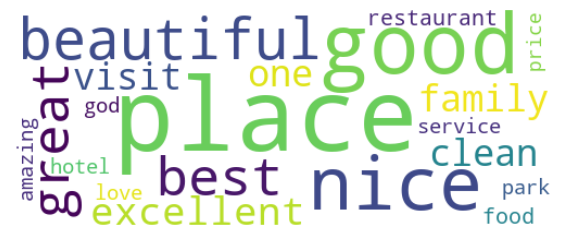

In [ ]:
#Represent common words in a word cloud viz
from wordcloud import WordCloud
wordcloud = WordCloud(width=500, height=200, background_color='white').generate_from_frequencies(common_keywords)
plt.figure(figsize=(7, 3))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [873]:
#Text Analysis (Themes)  - METHOD 1 Topic Modeling with LDA (Classic Probabilistic Approach)

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Prepare the text data (replace None with empty string)
texts = final_df['clean_content'].fillna('')

# Vectorize the text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Fit LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Show n top words for each topic
n=10
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx+1}: " + ", ".join([feature_names[i] for i in topic.argsort()[:-n:-1]]))

Topic #1: excellent, service, room, place, food, delicious, staff, restaurant, visit
Topic #2: place, nice, good, family, beautiful, visit, amazing, park, one
Topic #3: place, best, good, restaurant, great, one, clean, hotel, food
Topic #4: park, love, need, beautiful, price, time, like, even, place
Topic #5: god, mosque, may, prayer, good, beautiful, house, place, peace


In [ ]:
# Create a mapping dictionary after reviewing the keywords for each topic
topic_to_theme = {
    1: "Restaurant & Service Experience",
    2: "Family Outings & Parks",
    3: "Hotels & Cleanliness",
    4: "Parks & Value for Money",
    5: "Religious Sites & Worship"
}

In [ ]:
#Mapping topic with hihgets probability for each review

doc_topic_dist = lda.transform(X)
# Get the most probable topic 
most_probable_topic = np.argmax(doc_topic_dist, axis=1) +1
final_df['lda_topic'] = most_probable_topic

#Mapping the most probable topic to themes
final_df['theme_LDA'] = final_df['lda_topic'].map(topic_to_theme)

final_df

,id,content,date,language,title,normalized_rating,actual_rating,sentiment,offering_Accommodation,offering_Food & Beverage,offering_Retail,offering_Tourism Attractions/ Sites,destination,clean_content,lda_topic,theme_LDA
0,377380-167052110186,جميل جدن خدمه فاخره مميزه,2021-02-07 00:14:00+00:00,ara,Hotel Raffles Makkah Palace,100.0,5.0,missing,1,0,0,1,Makkah,None,1,Restaurant & Service Experience
1,377380-167053227344,مكان جميل في شرما على البحر,2021-02-07 00:01:00+00:00,ara,HYAT SHARMA RESORT,60.0,3.0,missing,1,0,0,0,Tabuk,None,1,Restaurant & Service Experience
2,377380-167056314181,Good Hotel,2021-02-07 01:51:00+00:00,eng,Novotel Yanbu,80.0,4.0,positive,1,0,0,0,Yanbu,good hotel,3,Hotels & Cleanliness
3,377380-167057432860,منتجع جميل يحتاج إلى ترتيب وأهتمام,2021-02-07 00:45:00+00:00,ara,منتجع و سبا درة الرياض / Durrat Al Riyadh Reso...,80.0,4.0,missing,1,1,0,0,Riyadh,None,1,Restaurant & Service Experience
4,377380-167058489640,جيده الاستقبال محترمين,2021-02-07 02:28:00+00:00,ara,ديم للغرف الفندقية,60.0,3.0,missing,1,0,0,0,Dammam,None,1,Restaurant & Service Experience
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,377380-208857650522,Nice and good,2021-06-01 12:07:00+00:00,eng,Burger King - Riyadh Gallery 2,100.0,5.0,positive,1,1,0,0,Riyadh,nice good,2,Family Outings & Parks
9947,377380-225738358384,رائعه وجميله جدا,2022-10-17 11:16:00+00:00,ara,Prince Hussam Park,100.0,5.0,missing,0,0,0,1,Al Baha,None,1,Restaurant & Service Experience
9948,377380-259913223515,أجمل متنزهات السعودية فعلآ رائعة,2023-10-03 06:31:00+00:00,ara,Arruddaf Park,100.0,5.0,missing,0,0,0,1,Taif,None,1,Restaurant & Service Experience
9949,377380-259913232905,جمييييله جدا ورائعه,2023-10-03 02:30:00+00:00,ara,Arruddaf Park,100.0,5.0,missing,0,0,0,1,Taif,None,1,Restaurant & Service Experience


In [868]:
#Text Analysis (Themes)  - METHOD 2 Using Ensemble Model *BERTopic* (LLM + Clustering + Keyword Extraction)
#BERTopic: Use BERT pre-trained LLM model for embedding + Clustering algorithm on embeddings via HDBSCAN + Keyword Extraction via TF-IDF for each cluster

from bertopic import BERTopic

# Prepare your review texts
texts = final_df['content'].astype(str).tolist()

# Create and fit BERTopic model (multilingual embeddings)
topic_model = BERTopic(language="multilingual")

topics, probs = topic_model.fit_transform(texts)
final_df['theme_topic'] = topics

# View topics and their keywords (Default is top 10 keywords per topic base on TF-IDF)
topic_info = topic_model.get_topic_info()
print(topic_info)

# Show keywords for a specific topic
print(topic_model.get_topic(0))  # Topic 0 keywords

RuntimeError: Failed to import transformers.integrations.integration_utils because of the following error (look up to see its traceback):
Failed to import transformers.modeling_tf_utils because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.

In [ ]:
# Create a mapping dictionary after reviewing the keywords for each topic
topic_to_theme = {
    0: "Food & Restaurants",
    1: "Religious Sites",
    2: "Shopping",
    3: "Accommodation",
    4: "Transport"
    # ...add as needed
}
final_df['theme'] = final_df['theme_topic'].map(topic_to_theme)

In [ ]:
#ADDING TOPIC REPRESENTATIONS LAYER
#Use chat-gpt from open AI to fine tune topic representations instead of manually coming up with themes

import openai
client= openai.OpenAI(api_key='sk-...')
representation_model=OpenAI(client, model='gpt-4o-mini',chat=True)
topic_model=BERTopic(representation_model=representation_model, language="multilingual") #Adding presentation model to BERTopic

texts = final_df['content'].astype(str).tolist()
topics, probs = topic_model.fit_transform(texts)
final_df['theme_topic_chatgpt'] = topics

topic_info = topic_model.get_topic_info()
print(topic_info[['Topic', 'Name']])  # 'Name' column contains the theme

# Create a mapping from topic number to theme name
topic_to_theme = dict(zip(topic_info['Topic'], topic_info['Name']))

# Assign theme to each review
final_df['theme'] = final_df['theme_topic_chatgpt'].map(topic_to_theme)



In [ ]:
topic_model.visualize_topics()

NameError: name 'topic_model' is not defined

#### Part 3: EDA

In [ ]:
#Distribution of sentiments, offerings, destinations, and ratings.


In [ ]:
# Sentiment vs Offering


In [ ]:
# Sentiment vs Destination


In [ ]:
# Sentiment vs Rating

#### Part4: Future Scope 

The data now is cleaned and labeled with themes --> ready to train an NLP model